In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
official_competition_dataset = pd.read_csv('/content/OfficialCompetitionDataset.csv')

In [ ]:
official_competition_dataset.head()

,Unnamed: 0,name,album,artist,auditory,beats_per_measure,beats_per_min,concert_probability,critic,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,review,reviewer_type,song_debut,styles,tone,volume,vulgar
0,21803,A Forgotten Chapter In The History Of Ideas,VI,the fucking champs,0.24030,4.0,175.934,32.00,adam moerder,70.0,1.216527,1.0,0.627541,1.060468,388200,8.0,major,5026,-0.676431,\r\n What an opportune time for a Fucking C...,NaN,2007-04-24,rock,C#,0.794281,NOT VULGAR
1,20617,I Would Like to Write a Song That...,Muted,alias,0.02061,4.0,97.017,24.40,william morris,60.0,1.382647,0.6,0.575489,1.256408,252560,7.0,major,7823,-0.684217,"Listen up, kids; it's time for me to play like...",NaN,2003-10-28,"electronic, rock",D,0.760773,NOT VULGAR
2,8523,Awake On A Train,Yesterday Was Dramatic – Today Is OK,mm,0.88200,4.0,110.005,9.99,matt lemay,91.0,1.469614,4.0,0.498955,1.125781,563253,3.0,major,161260,0.016498,"Surprises are the best. Once, when I was in ki...",contributor,2005-10-04,"electronic, rock",F,0.738168,NOT VULGAR
3,4018,Dress,Sylvan Esso,sylvan esso,2.57100,4.0,139.955,10.50,ian cohen,62.0,1.958150,8.8,0.456158,-0.844109,229840,9.0,minor,14379524,-0.964502,There are bands that arrive fully formed with ...,contributor,2014-05-13,pop/r&b,F,0.824472,NOT VULGAR
4,20834,People Die,Travistan,travis morrison,0.22140,3.0,144.033,35.00,chris dahlen,0.0,2.377382,0.4,0.400788,-0.844077,262627,8.0,minor,4549,1.857820,Travis Morrison got his ass kicked. He tells ...,NaN,2004,pop/r&b,F,0.777020,NOT VULGAR


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
!pip install nltk

In [ ]:
import xgboost as xgb
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True



```
Try to predict nplays just to see accuracy numbers
```



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


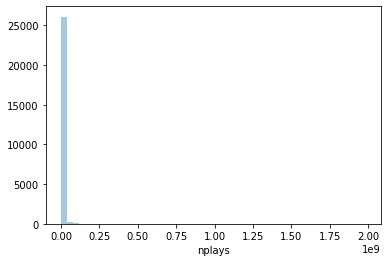

In [ ]:
# playing around with data
sns.distplot(y, kde=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


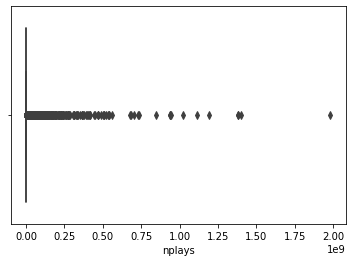

In [ ]:
sns.boxplot(y)

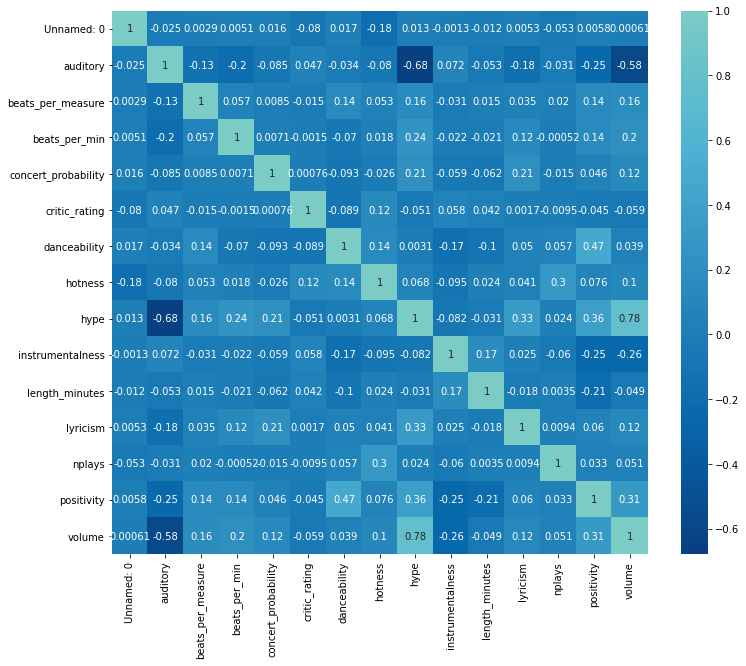

In [ ]:
correlations = official_competition_dataset.corr()
fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

In [ ]:
print('max nplays: ', np.max(y))
print('min nplays: ', np.min(y))

max nplays:  1980754119
min nplays:  0


In [ ]:
print(np.average(y))

3512969.4480078476


In [ ]:
z = np.abs(stats.zscore(y))
print(z)
print(z[z > 3]) # 3 std is common metric
print(z > 3)

[0.10443338 0.10435011 0.09978221 ... 0.08191295 0.20762473 0.10440159]
[ 9.95382246  3.47226116  6.21968905  3.89611956  3.66617772  5.03066425
  3.47226116  7.10271022 10.70594293  7.76936753  6.84225247 14.9354232
  4.41245492 15.99189362  6.77133517  5.55853908  5.09273187 10.43695592
 10.94039983 35.40576951  3.8133272   9.78614029  4.41013538  4.30355311
  7.22417403  6.71920179  4.79373127  3.63283311  3.93262492  9.24744642
  4.10997679  4.04870747 11.63199792 11.09724415  3.66681511  4.04119425
  4.98905012  3.25463601  5.72869036  8.96439134  5.72414386  5.48368096
  4.79323538 13.24678749  3.8133272   4.16944203  3.08730201  4.48651963
 41.63045655  7.02053563  9.13400279  3.04054056 13.92433657  4.0869616
 14.52767074  3.18201199  5.17821257 12.16453283  3.17684442  5.72869036
  3.08730201  6.59694828  3.09081506  8.33063105 30.2328569  13.94865184
  5.44285269  8.09195795  4.13986365 27.7591656  15.02681135 58.86354307
  6.82591719 15.77689623 10.70594293  5.48368096  5.15

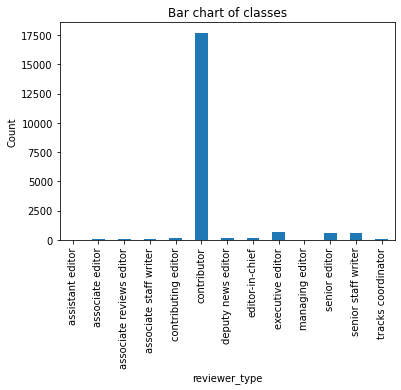

In [ ]:
groups = official_competition_dataset.groupby('reviewer_type')
plt.ylabel("Count")
plt.title("Bar chart of classes")
groups.size().plot.bar()

['rock' 'electronic, rock' 'pop/r&b' nan 'experimental, rock' 'electronic'
 'metal, rock' 'rap' 'experimental' 'folk/country' 'electronic, pop/r&b'
 'jazz, rap' 'metal' 'global' 'global, pop/r&b' 'folk/country, pop/r&b'
 'jazz, metal' 'electronic, experimental, metal, rock'
 'electronic, global' 'electronic, experimental, rock'
 'experimental, jazz' 'experimental, pop/r&b' 'electronic, pop/r&b, rap'
 'electronic, rap' 'jazz' 'electronic, experimental' 'folk/country, rock'
 'pop/r&b, rap' 'electronic, jazz, rock' 'pop/r&b, rock'
 'electronic, metal, rock' 'experimental, rap' 'jazz, rock'
 'electronic, jazz, pop/r&b' 'jazz, metal, rock' 'jazz, pop/r&b'
 'folk/country, pop/r&b, rock' 'experimental, metal, rock' 'rap, rock'
 'global, rock' 'folk/country, metal, rock' 'experimental, pop/r&b, rock'
 'experimental, folk/country, rock' 'electronic, folk/country, pop/r&b'
 'electronic, jazz' 'electronic, experimental, pop/r&b'
 'electronic, jazz, rap' 'experimental, metal']


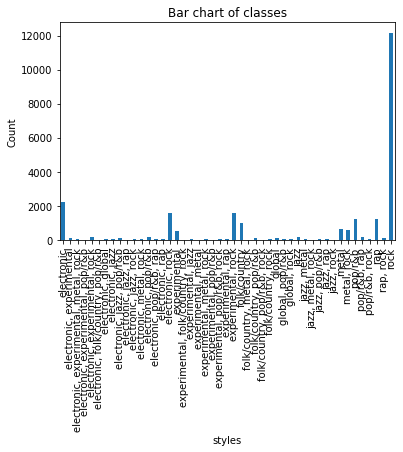

In [228]:
print(official_competition_dataset['styles'].unique())
groups = official_competition_dataset.groupby('styles')
plt.ylabel("Count")
plt.title("Bar chart of classes")
groups.size().plot.bar()

In [232]:
print(official_competition_dataset['tone'].unique())


['C#' 'D' 'F' 'C' 'E' 'A' 'B' 'Bb' 'Ab' 'G' 'F#' 'D#']


In [ ]:
def run_xgb(X_train, X_test, y_train, y_test):
  model = xgb.XGBRegressor()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_test, pred)
  print('r2 score: ', r2)
  print('adjusted r2 score: ', 1-(1-r2)*(n-1)/(n-p-1))
  print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, pred)))
  print('mean absolute error: ', mean_absolute_error(y_test, pred))
  return model

[15:17:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.169855119517337
adjusted r2 score:  0.16781390834913668
root mean squared error:  27510493.091725215
mean absolute error:  2676795.2316286135


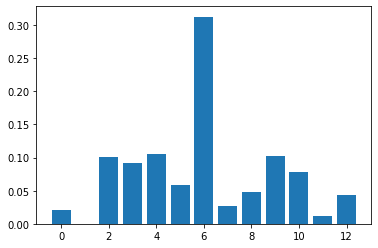

In [ ]:
# check feature importance decided by xgb
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = run_xgb(X_train, X_test, y_train, y_test)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
# base xgboost
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
run_xgb(X_train, X_test, y_train, y_test)

[14:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.169855119517337
adjusted r2 score:  0.16781390834913668
root mean squared error:  27510493.091725215
mean absolute error:  2676795.2316286135


In [ ]:
# scaler to [0-1] on entire X
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
for col in numerical_cols_no_nplays:
    X[col] = (X[col]-X[col].min()) / (X[col].max() - X[col].min()) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
run_xgb(X_train, X_test, y_train, y_test)

[14:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.16845913173632854
adjusted r2 score:  0.1664144880277173
root mean squared error:  27533614.465662096
mean absolute error:  2710623.8729295256


In [ ]:
# standard scaler
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
run_xgb(X_train, X_test, y_train, y_test)

[14:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.16985511555797683
adjusted r2 score:  0.16781390438004107
root mean squared error:  27510493.1573306
mean absolute error:  2676795.231646299


In [ ]:
# min max scaler
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
run_xgb(X_train, X_test, y_train, y_test)

[14:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.16845913173632854
adjusted r2 score:  0.1664144880277173
root mean squared error:  27533614.465662096
mean absolute error:  2710623.8729295256


In [ ]:
# remove outliers
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
z = np.abs(stats.zscore(y))
X = X[(z < 3)]
y = y[(z < 3)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
run_xgb(X_train, X_test, y_train, y_test)

[14:58:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.5438670358967226
adjusted r2 score:  0.5427386384593595
root mean squared error:  4525458.442618658
mean absolute error:  1013622.8286025315


In [ ]:
# hotness is 0.3 correlated with nplays while everything else is not much so just use hotness
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
z = np.abs(stats.zscore(y))
X = X[(z < 3)]
y = y[(z < 3)]
X = X[['hotness']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
run_xgb(X_train, X_test, y_train, y_test)

[15:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.5227211866633241
adjusted r2 score:  0.5226305698390719
root mean squared error:  4629167.864507579
mean absolute error:  996848.8559291374


In [ ]:
# try dropping highly correlated features
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
z = np.abs(stats.zscore(y))
X = X[(z < 3)]
y = y[(z < 3)]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
# print(to_drop)
X = X.drop(to_drop, axis=1)
# print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
run_xgb(X_train, X_test, y_train, y_test)

[15:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.5502448622662814
adjusted r2 score:  0.5493037729539225
root mean squared error:  4493708.7183071785
mean absolute error:  983868.658763643


In [ ]:
# try taking log of output nplays
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X = X[numerical_cols_no_nplays]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
# print(to_drop)
X = X.drop(to_drop, axis=1)
# print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
run_xgb(X_train, X_test, y_train, y_test)

[15:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.7531350557868431
adjusted r2 score:  0.7526216289790638
root mean squared error:  1.7510991574193908
mean absolute error:  1.077054594096571


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
def run_catboost(X_train, X_test, y_train, y_test, cat_features):
  model = catboost.CatBoostRegressor(cat_features=cat_features, logging_level="Silent")
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_test, pred)
  print('r2 score: ', r2)
  print('adjusted r2 score: ', 1-(1-r2)*(n-1)/(n-p-1))
  print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, pred)))
  print('mean absolute error: ', mean_absolute_error(y_test, pred))
  return model

In [ ]:
# base catboost
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
categorical_features = ['album', 'artist', 'critic', 'major/minor', 'reviewer_type', 'styles', 'tone', 'vulgar']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 
X = X[numerical_cols_no_nplays + categorical_features]
# z = np.abs(stats.zscore(y))
# X = X[(z < 3)]
# y = y[(z < 3)]
# cor_matrix = X.corr().abs()
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
# # print(to_drop)
# X = X.drop(to_drop, axis=1)
# # print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
run_catboost(X_train, X_test, y_train, y_test, categorical_features)

r2 score:  0.2553994285051181
adjusted r2 score:  0.25243738796687365
root mean squared error:  26054522.02034865
mean absolute error:  2899824.1364728743


In [ ]:
# base catboost, best preprocessing with xgboost before
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']
categorical_features = ['album', 'artist', 'critic', 'major/minor', 'reviewer_type', 'styles', 'tone', 'vulgar']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 
X = X[numerical_cols_no_nplays + categorical_features]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
run_catboost(X_train, X_test, y_train, y_test, categorical_features)

['hype', 'volume']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 19 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.8783765126448626
adjusted r2 score:  0.8779389352429032
root mean squared error:  1.229107174226429
mean absolute error:  0.7247617061003748


In [ ]:
# base catboost, best preprocessing with xgboost before, considering amateur band for features
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['album', 'artist', 'critic', 'major/minor', 'reviewer_type', 'styles', 'tone', 'vulgar']
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 
X = X[numerical_cols_no_nplays + categorical_features]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
run_catboost(X_train, X_test, y_train, y_test, categorical_features)

['hype', 'volume']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 17 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.7173087517353101
adjusted r2 score:  0.7163990884340607
root mean squared error:  1.8738602964770898
mean absolute error:  1.279311908257953


In [ ]:
# base catboost, best preprocessing with xgboost before, considering amateur band for features
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['album', 'artist', 'major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 
X = X[numerical_cols_no_nplays + categorical_features]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
run_catboost(X_train, X_test, y_train, y_test, categorical_features)

['hype', 'volume']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 15 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.6847405254384245
adjusted r2 score:  0.6838457492570766
root mean squared error:  1.9788601432685524
mean absolute error:  1.3375735593536193


In [ ]:
# base catboost, best preprocessing with xgboost before, considering amateur band for features
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['artist', 'major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 
X = X[numerical_cols_no_nplays + categorical_features]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
run_catboost(X_train, X_test, y_train, y_test, categorical_features)

['hype', 'volume']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.6423148176828108
adjusted r2 score:  0.6413674865151149
root mean squared error:  2.1078102022031695
mean absolute error:  1.4492005450644334


In [ ]:
# base catboost, best preprocessing with xgboost before, considering amateur band for features
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artis
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 
X = X[numerical_cols_no_nplays + categorical_features]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
run_catboost(X_train, X_test, y_train, y_test, categorical_features)

['hype', 'volume']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.16775511127722453
adjusted r2 score:  0.16570873647991102
root mean squared error:  3.21518965597247
mean absolute error:  2.2877941582317


In [ ]:
# base catboost, best preprocessing with xgboost before, considering amateur band for features
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['name', 'major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artis
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 
X = X[numerical_cols_no_nplays + categorical_features]
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
run_catboost(X_train, X_test, y_train, y_test, categorical_features)

['hype', 'volume']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.17477407773082998
adjusted r2 score:  0.1725884623483539
root mean squared error:  3.201602854624983
mean absolute error:  2.2717361248271652


In [ ]:
# try sentiment analysis of album and artist name, might expect super polarized/intense names to get more plays
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg', f'{f}_sent_neu', f'{f}_sent_compound', f'{f}_sent_max_emotion']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  X[f'{f}_sent_neu'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neu'])
  X[f'{f}_sent_compound'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['compound'])
  X[f'{f}_sent_max_emotion'] = X[f'{f}'].apply(lambda x: max(sia.polarity_scores(x)['neg'], sia.polarity_scores(x)['pos'], sia.polarity_scores(x)['neu']))
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
model = run_catboost(X_train, X_test, y_train, y_test, categorical_features)

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 36 columns]
['hype', 'volume', 'name_sent_neu', 'name_sent_compound', 'name_sent_max_emotion', 'album_sent_neu', 'album_sent_compound', 'album_sent_max_emotion', 'artist_sent_neu', 'artist_sent_compound', 'artist_sent_max_emotion']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.4155374728418766
adjusted r2 score:  0.41276750825818875
root mean squared error:  2.6943832095103573
mean absolute error:  1.8805386242173712


Index(['album_len', 'artist_len', 'styles'], dtype='object')


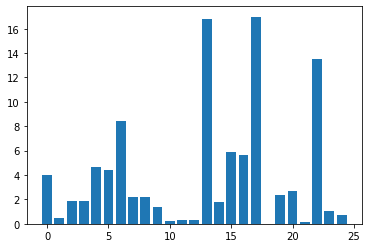

In [ ]:
model.feature_importances_
print(X_train.columns[model.feature_importances_ > 10])
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
def run_catboost_with_params(X_train, X_test, y_train, y_test, cat_features, params=None):
  model = catboost.CatBoostRegressor(max_depth=8, cat_features=cat_features, logging_level="Silent")
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  n = X_test.shape[0]
  p = X_test.shape[1]
  r2 = r2_score(y_test, pred)
  print('r2 score: ', r2)
  print('adjusted r2 score: ', 1-(1-r2)*(n-1)/(n-p-1))
  print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, pred)))
  print('mean absolute error: ', mean_absolute_error(y_test, pred))
  return model

In [204]:
# catboost attempt hyper paramter tuning
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg', f'{f}_sent_neu', f'{f}_sent_compound', f'{f}_sent_max_emotion']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  X[f'{f}_sent_neu'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neu'])
  X[f'{f}_sent_compound'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['compound'])
  X[f'{f}_sent_max_emotion'] = X[f'{f}'].apply(lambda x: max(sia.polarity_scores(x)['neg'], sia.polarity_scores(x)['pos'], sia.polarity_scores(x)['neu']))
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])
model = run_catboost_with_params(X_train, X_test, y_train, y_test, categorical_features)

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 36 columns]
['hype', 'volume', 'name_sent_neu', 'name_sent_compound', 'name_sent_max_emotion', 'album_sent_neu', 'album_sent_compound', 'album_sent_max_emotion', 'artist_sent_neu', 'artist_sent_compound', 'artist_sent_max_emotion']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.4650841299394807
adjusted r2 score:  0.4625489836358764
root mean squared error:  2.5776489418046915
mean absolute error:  1.7905881159542933


In [194]:
# catboost randomsearch
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg', f'{f}_sent_neu', f'{f}_sent_compound', f'{f}_sent_max_emotion']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  X[f'{f}_sent_neu'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neu'])
  X[f'{f}_sent_compound'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['compound'])
  X[f'{f}_sent_max_emotion'] = X[f'{f}'].apply(lambda x: max(sia.polarity_scores(x)['neg'], sia.polarity_scores(x)['pos'], sia.polarity_scores(x)['neu']))
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 36 columns]
['hype', 'volume', 'name_sent_neu', 'name_sent_compound', 'name_sent_max_emotion', 'album_sent_neu', 'album_sent_compound', 'album_sent_max_emotion', 'artist_sent_neu', 'artist_sent_compound', 'artist_sent_max_emotion']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

NameError: ignored

In [196]:
model = catboost.CatBoostRegressor(cat_features=categorical_features, logging_level='Silent')

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_result = model.randomized_search(grid,
                                                   X=X,
                                                   y=y,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 2.7776986	best: 2.7776986 (0)	total: 12.3s	remaining: 1m 50s
1:	loss: 2.6406363	best: 2.6406363 (1)	total: 31.9s	remaining: 2m 7s
2:	loss: 2.5115236	best: 2.5115236 (2)	total: 1m 7s	remaining: 2m 38s
3:	loss: 2.7098967	best: 2.5115236 (2)	total: 1m 42s	remaining: 2m 33s
4:	loss: 2.5417546	best: 2.5115236 (2)	total: 2m 17s	remaining: 2m 17s
5:	loss: 2.7719810	best: 2.5115236 (2)	total: 2m 51s	remaining: 1m 54s
6:	loss: 2.5453049	best: 2.5115236 (2)	total: 3m 25s	remaining: 1m 28s
7:	loss: 2.6259614	best: 2.5115236 (2)	total: 4m 43s	remaining: 1m 10s
8:	loss: 2.4896113	best: 2.4896113 (8)	total: 6m 2s	remaining: 40.3s
9:	loss: 2.5159248	best: 2.4896113 (8)	total: 7m 20s	remaining: 0us
Estimating final quality...


In [199]:
randomized_search_result['params']

{'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [ ]:
randomized_search_result['cv_results']

In [220]:
# catboost attempt hyper paramter tuning with best fit from random serach
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg', f'{f}_sent_neu', f'{f}_sent_compound', f'{f}_sent_max_emotion']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  X[f'{f}_sent_neu'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neu'])
  X[f'{f}_sent_compound'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['compound'])
  X[f'{f}_sent_max_emotion'] = X[f'{f}'].apply(lambda x: max(sia.polarity_scores(x)['neg'], sia.polarity_scores(x)['pos'], sia.polarity_scores(x)['neu']))
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])

grid = {'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
model = catboost.CatBoostRegressor(depth=10, l2_leaf_reg=5, learning_rate=0.1, cat_features=categorical_features, logging_level="Silent")
model.fit(X_train, y_train)
pred = model.predict(X_test)
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, pred)
print('r2 score: ', r2)
print('adjusted r2 score: ', 1-(1-r2)*(n-1)/(n-p-1))
print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, pred)))
print('mean absolute error: ', mean_absolute_error(y_test, pred))

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 36 columns]
['hype', 'volume', 'name_sent_neu', 'name_sent_compound', 'name_sent_max_emotion', 'album_sent_neu', 'album_sent_compound', 'album_sent_max_emotion', 'artist_sent_neu', 'artist_sent_compound', 'artist_sent_max_emotion']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.49131945049942316
adjusted r2 score:  0.48890864220795127
root mean squared error:  2.513642979513653
mean absolute error:  1.7503712450878306


In [221]:
# catboost attempt hyper paramter tuning with best fit from random serach
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg', f'{f}_sent_neu', f'{f}_sent_compound']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  X[f'{f}_sent_neu'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neu'])
  X[f'{f}_sent_compound'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['compound'])
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])

grid = {'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
model = catboost.CatBoostRegressor(depth=10, l2_leaf_reg=5, learning_rate=0.1, cat_features=categorical_features, logging_level="Silent")
model.fit(X_train, y_train)
pred = model.predict(X_test)
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, pred)
print('r2 score: ', r2)
print('adjusted r2 score: ', 1-(1-r2)*(n-1)/(n-p-1))
print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, pred)))
print('mean absolute error: ', mean_absolute_error(y_test, pred))

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 33 columns]
['hype', 'volume', 'name_sent_neu', 'name_sent_compound', 'album_sent_neu', 'album_sent_compound', 'artist_sent_neu', 'artist_sent_compound']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.49131945049942316
adjusted r2 score:  0.48890864220795127
root mean squared error:  2.513642979513653
mean absolute error:  1.7503712450878306


In [224]:
# catboost attempt hyper paramter tuning with best fit from random serach
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])

grid = {'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
model = catboost.CatBoostRegressor(depth=10, l2_leaf_reg=5, learning_rate=0.1, cat_features=categorical_features, logging_level="Silent")
model.fit(X_train, y_train)
pred = model.predict(X_test)
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, pred)
print('r2 score: ', r2)
print('adjusted r2 score: ', 1-(1-r2)*(n-1)/(n-p-1))
print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, pred)))
print('mean absolute error: ', mean_absolute_error(y_test, pred))

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 27 columns]
['hype', 'volume']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.49131945049942316
adjusted r2 score:  0.48890864220795127
root mean squared error:  2.513642979513653
mean absolute error:  1.7503712450878306


In [225]:
print(X_train.columns)

Index(['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
       'danceability', 'instrumentalness', 'length_minutes', 'lyricism',
       'positivity', 'name_len', 'name_upper', 'name_sent_pos',
       'name_sent_neg', 'album_len', 'album_upper', 'album_sent_pos',
       'album_sent_neg', 'artist_len', 'artist_upper', 'artist_sent_pos',
       'artist_sent_neg', 'major/minor', 'styles', 'tone', 'vulgar'],
      dtype='object')


In [212]:
model.get_params()

{'cat_features': ['major/minor', 'styles', 'tone', 'vulgar'],
 'depth': 10,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1,
 'logging_level': 'Silent',
 'loss_function': 'RMSE'}

Index(['auditory', 'danceability', 'instrumentalness', 'length_minutes',
       'album_len', 'artist_len', 'styles'],
      dtype='object')


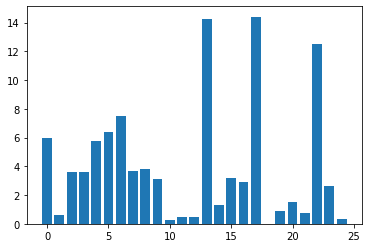

In [222]:
model.feature_importances_
print(X_train.columns[model.feature_importances_ > 5])
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [214]:
# more catboost randomsearch
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg', f'{f}_sent_neu', f'{f}_sent_compound', f'{f}_sent_max_emotion']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  X[f'{f}_sent_neu'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neu'])
  X[f'{f}_sent_compound'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['compound'])
  X[f'{f}_sent_max_emotion'] = X[f'{f}'].apply(lambda x: max(sia.polarity_scores(x)['neg'], sia.polarity_scores(x)['pos'], sia.polarity_scores(x)['neu']))
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 36 columns]
['hype', 'volume', 'name_sent_neu', 'name_sent_compound', 'name_sent_max_emotion', 'album_sent_neu', 'album_sent_compound', 'album_sent_max_emotion', 'artist_sent_neu', 'artist_sent_compound', 'artist_sent_max_emotion']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


In [215]:
model = catboost.CatBoostRegressor(cat_features=categorical_features, logging_level='Silent')

grid = {'learning_rate': [0.03, 0.1, 0.3],
        'depth': [8, 10, 12, 15],
        'l2_leaf_reg': [3, 5, 7],
        'random_strength': [0.1, 1, 10],
        'bagging_temperature': [0, 1, 5],
        'iterations': [100, 300, 500, 1000]}

randomized_search_result = model.randomized_search(grid,
                                                   X=X,
                                                   y=y,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 2.5646453	best: 2.5646453 (0)	total: 36.4s	remaining: 5m 27s
1:	loss: 2.8687936	best: 2.5646453 (0)	total: 38.7s	remaining: 2m 34s
2:	loss: 2.4978048	best: 2.4978048 (2)	total: 1m 57s	remaining: 4m 35s
3:	loss: 2.8951520	best: 2.4978048 (2)	total: 2m 20s	remaining: 3m 30s
4:	loss: 2.6021341	best: 2.4978048 (2)	total: 2m 56s	remaining: 2m 56s
5:	loss: 2.7478274	best: 2.4978048 (2)	total: 4m 53s	remaining: 3m 15s
6:	loss: 2.7036288	best: 2.4978048 (2)	total: 5m 58s	remaining: 2m 33s
7:	loss: 2.6170001	best: 2.4978048 (2)	total: 9m 35s	remaining: 2m 24s
8:	loss: 2.8063480	best: 2.4978048 (2)	total: 12m 25s	remaining: 1m 22s
9:	loss: 2.8117624	best: 2.4978048 (2)	total: 12m 35s	remaining: 0us
Estimating final quality...


In [216]:
model.get_params()

{'bagging_temperature': 0,
 'cat_features': ['major/minor', 'styles', 'tone', 'vulgar'],
 'depth': 10,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1,
 'logging_level': 'Silent',
 'loss_function': 'RMSE',
 'random_strength': 0.1}

Index(['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
       'danceability', 'instrumentalness', 'length_minutes', 'lyricism',
       'positivity', 'name_len', 'name_upper', 'name_sent_pos',
       'name_sent_neg', 'album_len', 'album_upper', 'album_sent_pos',
       'album_sent_neg', 'artist_len', 'artist_upper', 'artist_sent_pos',
       'artist_sent_neg', 'major/minor', 'styles', 'tone', 'vulgar'],
      dtype='object')
Index(['album_len', 'artist_len', 'styles'], dtype='object')


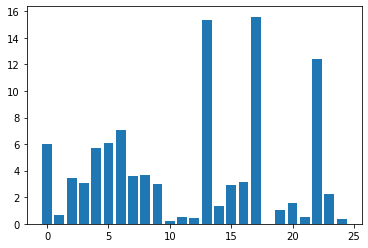

In [217]:
print(X_train.columns)
print(X_train.columns[model.feature_importances_ > 10])
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [219]:
# catboost after getting params from larger randomsearch 
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                  'danceability', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume'] # no hotness and critic rating because unlikely for amateur band
categorical_features = ['major/minor', 'styles', 'tone', 'vulgar'] # no critic/reviewer_type/album/artist/name
numerical_cols_no_nplays = [x for x in numerical_cols if x != 'nplays']
y = official_competition_dataset['nplays']
y = np.log1p(y)
X = official_competition_dataset.drop('nplays', axis=1)
X["reviewer_type"].fillna("contributor", inplace=True) 
X["styles"].fillna("rock", inplace=True) 

text_features = ['name', 'album', 'artist']
extra_numerical_features = []
sia = SentimentIntensityAnalyzer()
for f in text_features:
  temp = [f'{f}_len', f'{f}_upper', f'{f}_sent_pos', f'{f}_sent_neg', f'{f}_sent_neu', f'{f}_sent_compound', f'{f}_sent_max_emotion']
  X[f'{f}_len'] = X[f'{f}'].str.len()
  X[f'{f}_upper'] = X[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
  X[f'{f}_sent_pos'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
  X[f'{f}_sent_neg'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
  X[f'{f}_sent_neu'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neu'])
  X[f'{f}_sent_compound'] = X[f'{f}'].apply(lambda x: sia.polarity_scores(x)['compound'])
  X[f'{f}_sent_max_emotion'] = X[f'{f}'].apply(lambda x: max(sia.polarity_scores(x)['neg'], sia.polarity_scores(x)['pos'], sia.polarity_scores(x)['neu']))
  extra_numerical_features = extra_numerical_features + temp
X.drop(text_features, axis=1, inplace=True)

X = X[numerical_cols_no_nplays + extra_numerical_features + categorical_features]
print(X.head())
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)
numerical_cols_no_nplays_no_highly_correlated_features = [x for x in numerical_cols_no_nplays if x not in to_drop]
X = X.drop(to_drop, axis=1)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.fit_transform(X_train[numerical_cols_no_nplays_no_highly_correlated_features])
X_test[numerical_cols_no_nplays_no_highly_correlated_features] = scaler.transform(X_test[numerical_cols_no_nplays_no_highly_correlated_features])

grid = {'bagging_temperature': 0,
 'cat_features': ['major/minor', 'styles', 'tone', 'vulgar'],
 'depth': 10,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1,
 'logging_level': 'Silent',
 'loss_function': 'RMSE',
 'random_strength': 0.1}
model = catboost.CatBoostRegressor(depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, loss_function='RMSE', random_strength=0.1, cat_features=categorical_features, logging_level="Silent")
model.fit(X_train, y_train)
pred = model.predict(X_test)
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, pred)
print('r2 score: ', r2)
print('adjusted r2 score: ', 1-(1-r2)*(n-1)/(n-p-1))
print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, pred)))
print('mean absolute error: ', mean_absolute_error(y_test, pred))

   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 36 columns]
['hype', 'volume', 'name_sent_neu', 'name_sent_compound', 'name_sent_max_emotion', 'album_sent_neu', 'album_sent_compound', 'album_sent_max_emotion', 'artist_sent_neu', 'artist_sent_compound', 'artist_sent_max_emotion']
   auditory  beats_per_measure  ...  tone      vulgar
0   0.24030                4.0  ...    C#  NOT VULGAR
1   0.02061                4.0  ...     D  NOT VULGAR
2   0.88200                4.0  ...     F  NOT VULGAR
3   2.57100                4.0  ...     F  NOT VULGAR
4   0.22140                3.0  ...     F  NOT VULGAR

[5 rows x 25 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

r2 score:  0.48296746484989095
adjusted r2 score:  0.4805170736880421
root mean squared error:  2.5341946165325093
mean absolute error:  1.7651270610441003
